In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import csv


API keys can be found here: https://twelvedata.com/account/api-keys

In [2]:
# Function to read API key from CSV
def get_api_key(file_path, service_name):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['service'] == service_name:
                return row['key']
    raise ValueError(f"API key for {service_name} not found in the CSV file")

In [3]:
# Twelve Data API endpoint and API key
BASE_URL = "https://api.twelvedata.com/time_series"

# Get API key from CSV file
API_KEY = get_api_key('api_keys.csv', 'twelve_data')

# Set up parameters for the API request
symbol = "DJT"
interval = "1h"
end_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")

params = {
    "symbol": symbol,
    "interval": interval,
    "apikey": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

response = requests.get(BASE_URL, params=params)

             datetime      open      high       low   close   volume
4 2024-12-06 11:30:00  34.59000  34.95000  34.22000  34.510  1105204
3 2024-12-06 12:30:00  34.51000  35.14000  34.41470  34.770   925987
2 2024-12-06 13:30:00  34.77000  35.00000  34.59000  34.790   648114
1 2024-12-06 14:30:00  34.78000  35.00000  34.35000  34.420   915065
0 2024-12-06 15:30:00  34.42000  34.86000  34.42000  34.739   795810


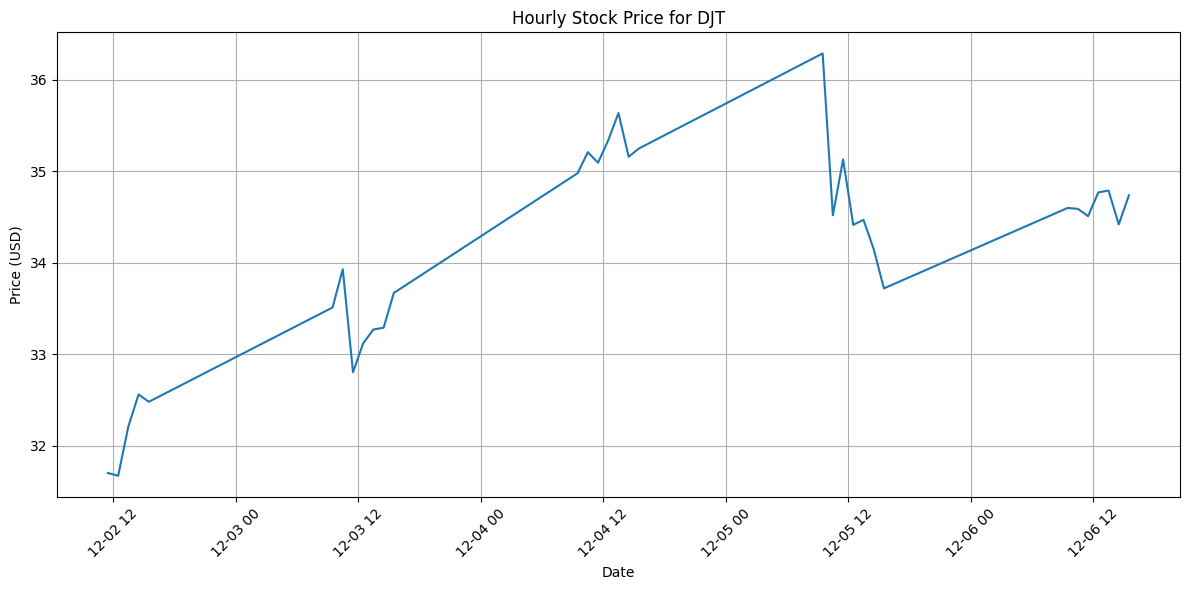

Current price: $34.74
Highest price: $36.29
Lowest price: $31.67
Average price: $34.12


In [4]:
if response.status_code == 200:
    data = response.json()
    
    if "values" in data:
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data["values"])
        
        # Convert datetime and numeric columns
        df["datetime"] = pd.to_datetime(df["datetime"])
        df["close"] = pd.to_numeric(df["close"])
        
        # Sort the DataFrame by date
        df = df.sort_values("datetime")
        
        print(df.tail())

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df["datetime"], df["close"])
        plt.title(f'Hourly Stock Price for {symbol}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print some statistics
        print(f"Current price: ${df['close'].iloc[-1]:.2f}")
        print(f"Highest price: ${df['close'].max():.2f}")
        print(f"Lowest price: ${df['close'].min():.2f}")
        print(f"Average price: ${df['close'].mean():.2f}")

    else:
        print("No data found in the response")
else:
    print(f"Error: {response.status_code}")
    print(response.text)
